In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
sns.set_style('darkgrid')

In [5]:
import yfinance as yf

# load the dataset
ticker_symbol = 'IBM'
ticker = yf.Ticker(ticker_symbol)

In [6]:
# data = yf.download(ticker_symbol, start="2025-03-01",end="2025-05-06")
data = pd.read_csv('IBM_history_1.csv')

data['Date'] = pd.to_datetime(data['Date'], utc=True)
data.set_index('Date', inplace=True)

# Step 2: Fill any missing values with forward fill
data.ffill(inplace=True)

# Step 3: Sort data in chronological order
data.sort_index(inplace=True)

In [7]:
# Step 4: Calculate 5-day Simple Moving Average (SMA_5)
data['SMA_5'] = data['Close'].rolling(window=5).mean().shift(1)

# Step 5: Drop rows where SMA_5 is NaN
data = data.dropna(subset=['SMA_5'])

# Step 6: Create input (X) and output (Y)
X = data[['SMA_5']]  # Features (inputs)
Y = data['Close']    # Target (outputs)

# Step 7: Split data into training and testing (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

# z-score Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Create and Train the model using ElasticNet
alpha_value = 0.1  # Regularization strength (you can tune this)
l1_ratio_value = 0.1  # Balance between Lasso (L1) and Ridge (L2)

model = ElasticNet(alpha=alpha_value, l1_ratio=l1_ratio_value)
# model = LinearRegression()
model.fit(X_train_scaled, Y_train)

# Step 9: Evaluate the model using Mean Squared Error
Y_predicted = model.predict(X_test_scaled)

In [8]:
mse = mean_squared_error(Y_test, Y_predicted)
mae = mean_absolute_error(Y_test, Y_predicted)
r2 = r2_score(Y_test, Y_predicted)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 71.9643
Mean Absolute Error: 7.6401
R² Score: 0.0144


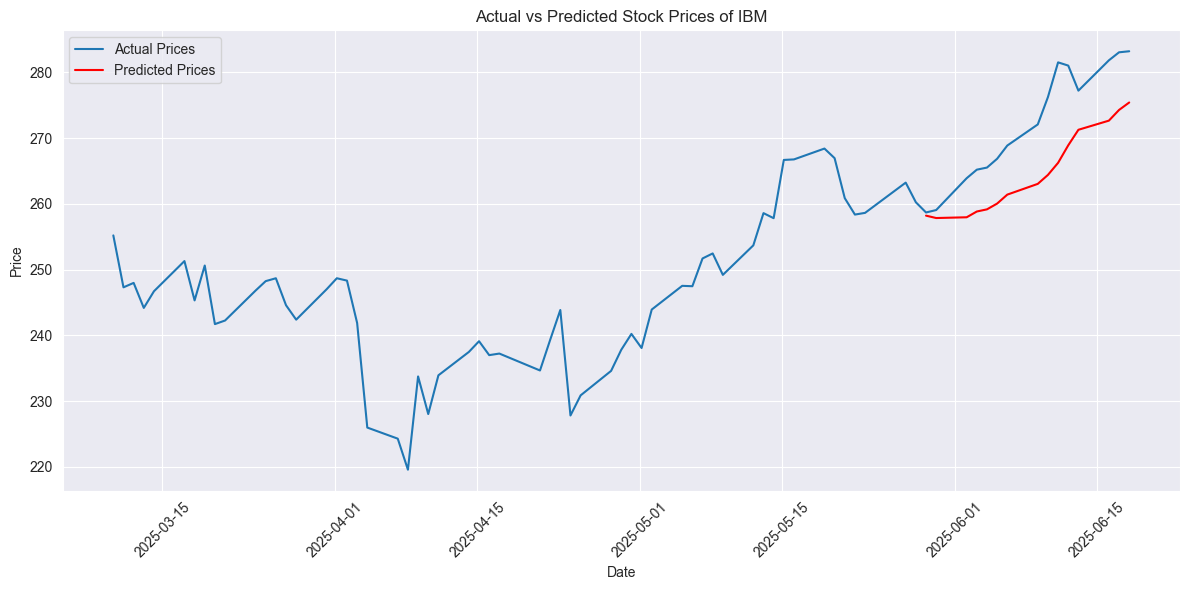

In [9]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Actual Prices')
plt.plot(Y_test.index, Y_predicted, label='Predicted Prices', color='red')
# Formatting the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Custom date format
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())            # Auto-spacing
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title(f"Actual vs Predicted Stock Prices of {ticker_symbol}")
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()  # Adjust layout to prevent label cut-off
plt.legend()
plt.grid(True)
plt.show()# 